In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [4]:
data.shape

(545, 13)

In [5]:
data['mainroad'] = data['mainroad'].replace({'yes':1,'no':0}).astype(int)
data['guestroom'] = data['guestroom'].replace({'yes':1,'no':0}).astype(int)
data['basement'] = data['basement'].replace({'yes':1,'no':0}).astype(int)
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
data['airconditioning'] = data['airconditioning'].replace({'yes':1,'no':0}).astype(int)
data['prefarea'] = data['prefarea'].replace({'yes':1,'no':0}).astype(int)
data['furnishingstatus'] = data['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)

In [6]:
corr = data.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


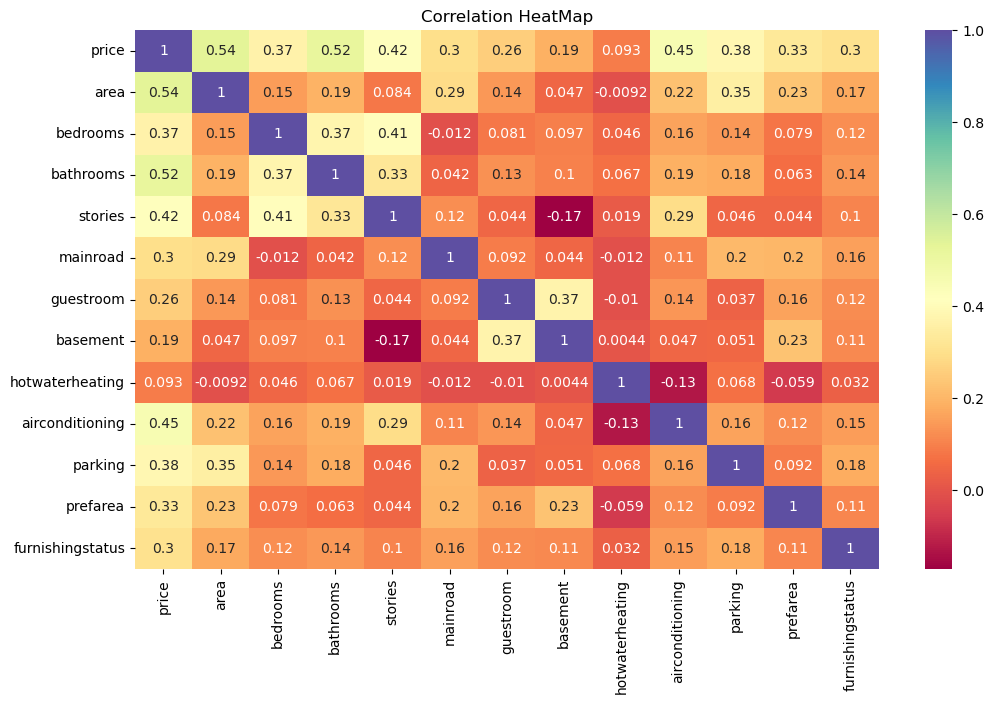

In [7]:
price_corr = data.corr()
plt.figure(figsize= (12,7))
sns.heatmap(price_corr,annot = True,  cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()

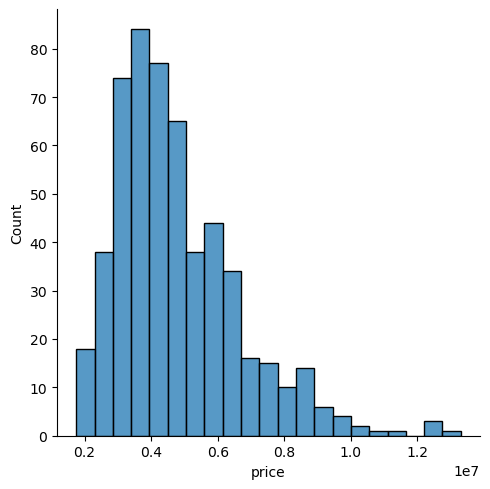

In [8]:
sns.displot(data['price'])

<Axes: >

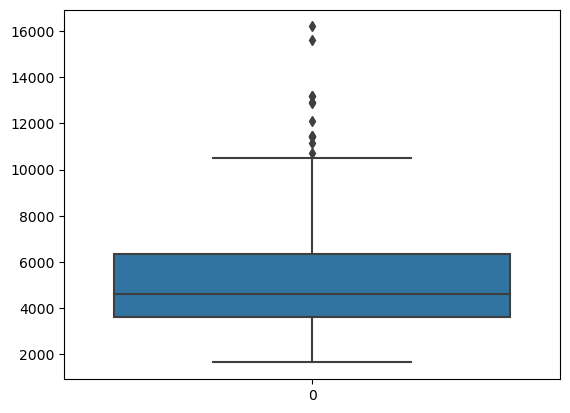

In [9]:
sns.boxplot(data['area'])

In [10]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

IQR, Q1, Q3

(2310000.0, 3430000.0, 5740000.0)

In [11]:
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

upper_bound, lower_bound
data = data[(data['price'] <= upper_bound) & (data['price'] >=  lower_bound)]

In [12]:
Q1_area = data['area'].quantile(0.25)
Q3_area = data['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

IQR_area, Q1_area, Q3_area

(2764.0, 3596.0, 6360.0)

In [13]:

upper_bound_area = Q3_area + 3 * IQR_area
lower_bound_area = Q1_area - 3 * IQR_area

upper_bound_area, lower_bound_area
data = data[(data['area'] <= upper_bound_area) & (data['area'] >=  lower_bound_area)]

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [15]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [16]:
scalar = StandardScaler()

x_scale = scalar.fit_transform(x)
random = RandomForestRegressor()
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_scale,y, test_size= 0.2 , random_state=2)

In [17]:
reg.fit(x_train,y_train)
random.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
y_pred_random = random.predict(x_test)
y_pred_reg = reg.predict(x_test)

In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

MAE: 793903.7820286225
MSE: 1206358026840.219
RMSE: 1098343.310099451


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_reg)

0.6762352111174676

In [21]:
r2_score(y_test, y_pred_random)

0.628143045823985